In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("/content/drive/MyDrive/praktikum_ml/praktikum05/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [6]:
(df.isnull().sum())

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [7]:
df.duplicated().sum()

np.int64(1)

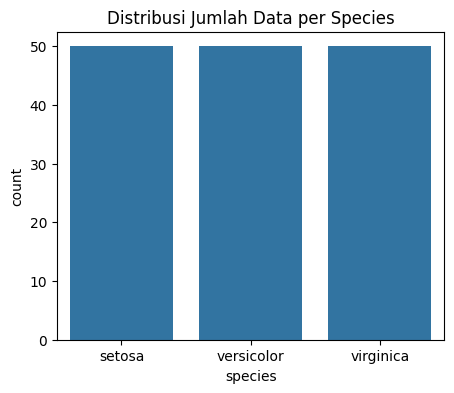

In [8]:
# 1. Visualisasi jumlah data per species
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='species')
plt.title("Distribusi Jumlah Data per Species")
plt.show()

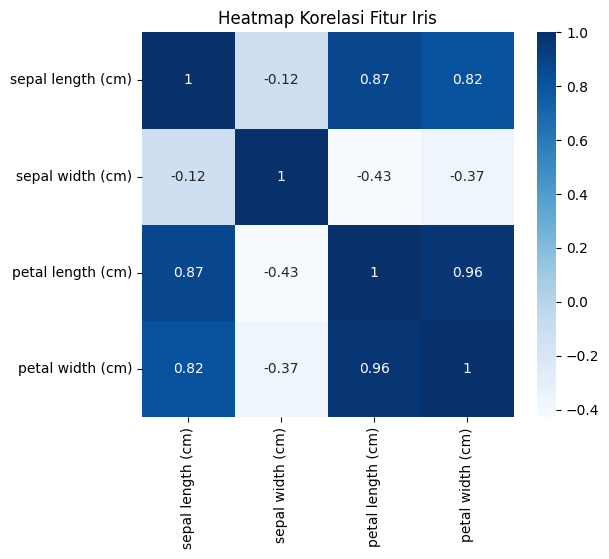

In [9]:
# 2. Heatmap korelasi antar fitur
plt.figure(figsize=(6,5))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='Blues')
plt.title("Heatmap Korelasi Fitur Iris")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])

Jumlah data training: 120
Jumlah data testing : 30


In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)
print("Model Decision Tree berhasil dilatih!")

Model Decision Tree berhasil dilatih!


In [13]:
#Evaluasi Model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=iris.target_names
))

Akurasi: 100.0 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



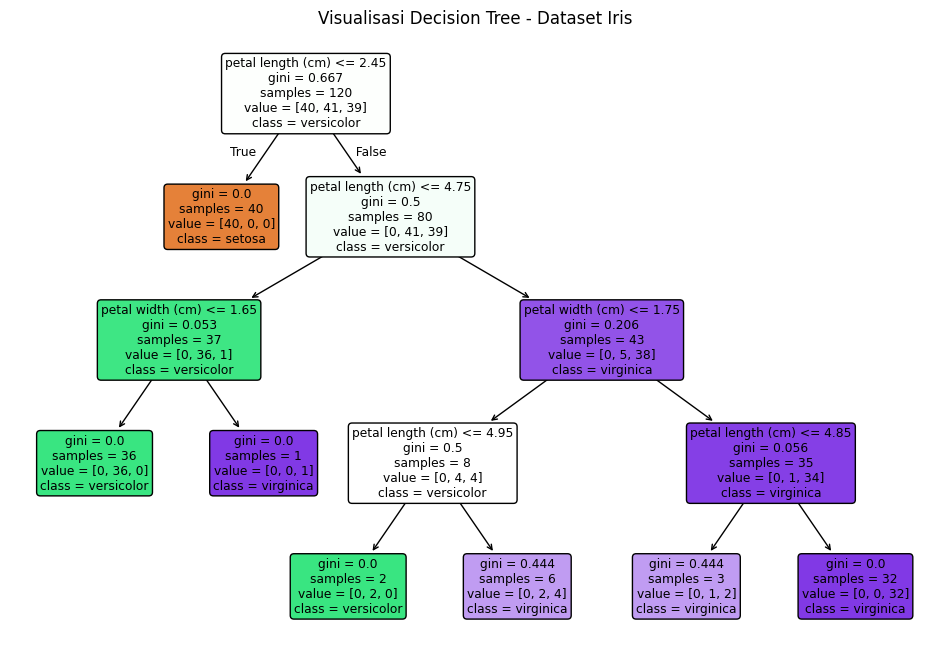

In [14]:
#Visualisasi Decision Tree

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(
    dt,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("Visualisasi Decision Tree - Dataset Iris")
plt.show()

               Fitur  Importance
2  petal length (cm)    0.936298
3   petal width (cm)    0.063702
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


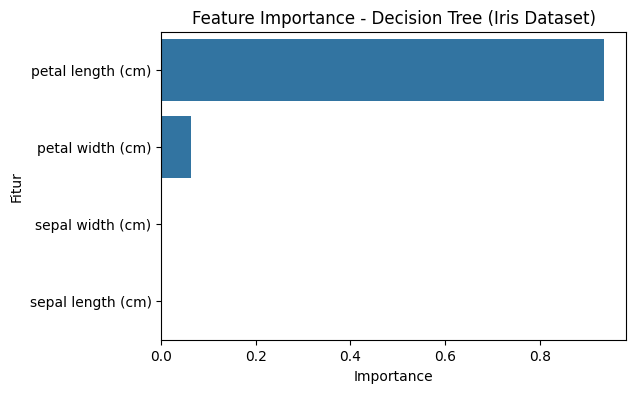

In [15]:
#Fitur Penting

feature_importance = pd.DataFrame({
    'Fitur': iris.feature_names,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Visualisasinya
plt.figure(figsize=(6,4))
sns.barplot(data=feature_importance, x='Importance', y='Fitur')
plt.title("Feature Importance - Decision Tree (Iris Dataset)")
plt.show()

In [16]:
#Prediksi Data Testing

#Menampilkan 10 hasil prediksi pertama
prediksi_df = pd.DataFrame({
    'Actual'   : y_test.values,
    'Prediksi' : y_pred
})

print("=== Perbandingan Actual vs Prediksi (10 data pertama) ===")
display(prediksi_df.head(10))

=== Perbandingan Actual vs Prediksi (10 data pertama) ===


,Actual,Prediksi
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor
